# Uber Exploratory Data Analysis (EDA)

In today's fast-paced urban environments, ride-sharing platforms like Uber have revolutionized the way people commute. With millions of rides happening daily across various cities worldwide, analyzing Uber trip data provides valuable insights into customer behavior, operational efficiency, and business growth patterns. This project aims to perform Exploratory Data Analysis (EDA) on Uber ride data to uncover hidden trends, patterns, and relationships within the dataset.

The primary objective of this analysis is to leverage data-driven techniques to gain a comprehensive understanding of ride frequency, trip duration, popular routes, and peak demand hours. By applying various statistical and visualization methods, the project will help identify factors that influence ride demand and customer preferences. Additionally, this study will explore how external factors such as weather conditions, time of day, and day of the week impact ride patterns.

This project will serve as a stepping stone for further predictive analysis and optimization strategies that can enhance decision-making processes for ride-sharing companies, enabling them to improve service quality and operational efficiency.

In [3]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [4]:
#reading the data which is in CSV file
df= pd.read_csv('Uber_data.csv')

In [5]:
# look at the first 5 records in the apps dataframe
df.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
# look at the last 5 records in the apps dataframe
df.tail(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


# Column Descriptions:
1. START_DATE – The date and time when the trip started.
2. END_DATE – The date and time when the trip ended.
3. CATEGORY – The category of the trip.
4. START – The starting location of the trip.
5. STOP – The destination of the trip.
6. MILES – The total distance covered during the trip, measured in miles.

In [7]:
# look that the shape of the dataframe
df.shape

(1156, 7)

In [8]:
# look that statistical information for numerical data >> five points summary
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [9]:
# look the  information for categorical columns
df.describe(include= 'all')

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
count,1156,1155,1155,1155,1155,1156.000000,653
unique,1155,1154,2,177,188,NaN,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,NaN,Meeting
freq,2,2,1078,201,203,NaN,187
mean,NaN,NaN,NaN,NaN,NaN,21.115398,NaN
std,NaN,NaN,NaN,NaN,NaN,359.299007,NaN
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.900000,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,10.400000,NaN


In [10]:
# look that the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [11]:
#checking the null values
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(1)

## By diagnosing the data frame, we know that:

There are 7 columns of properties with 1156 rows of data.

We should correct the date format because it's wrong.

There are a lot of null or missing values in the PURPOSE column.

There is a duplicate value.

###                              Hence, we will need to do some data cleaning.

# Data Cleaning 

>>Replacing the missing values of the PURPOSE* column with the word unknown:

In [13]:
df['PURPOSE'].fillna('Unknown', inplace= True)

In [14]:
#rechecking the null values
df.isnull().sum()

START_DATE    0
END_DATE      1
CATEGORY      1
START         1
STOP          1
MILES         0
PURPOSE       0
dtype: int64

In [15]:
#Removed the last index [1155] due to the presence of null values
df.drop(index= df.index[-1], inplace= True)

### Remove Duplicates:

In [16]:
df= df.drop_duplicates()

In [17]:
#rechecking the duplicates values
df.duplicated().sum()

np.int64(0)

In [18]:
#resetting the index after dropping the duplicate values original index is still there
df.reset_index(drop= True, inplace= True)

### Correct the format of the Date columns:

In [19]:
df['START_DATE']= pd.to_datetime(df['START_DATE'], errors= 'coerce')
df['END_DATE']= pd.to_datetime(df['END_DATE'], errors= 'coerce')

### Separate Date to year, month, day, and hour columns to be easier in analysis:

In [20]:
df['Start_year']= df['START_DATE'].dt.year
df['Start_month']= df['START_DATE'].dt.month_name()
df['Start_day']= df['START_DATE'].dt.day_name()
df['Start_hour']= df['START_DATE'].dt.hour

### Trip Duration Time Calculation:

In [21]:
df['Trip_Duration_time']= df['END_DATE'] -df['START_DATE']

In [22]:
#rechecking the first 5 rows 
df.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Start_year,Start_month,Start_day,Start_hour,Trip_Duration_time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016.0,January,Friday,21.0,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016.0,January,Saturday,1.0,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016.0,January,Saturday,20.0,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016.0,January,Tuesday,17.0,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016.0,January,Wednesday,14.0,0 days 01:07:00


In [23]:
#checking the unique value in columns
df.nunique()

START_DATE            421
END_DATE              420
CATEGORY                2
START                 177
STOP                  188
MILES                 256
PURPOSE                11
Start_year              1
Start_month            12
Start_day               7
Start_hour             23
Trip_Duration_time     59
dtype: int64

#### Based on the unique value counts, we observe that the columns **START_DATE**, **END_DATE**, and **Start_year** have high cardinality or limited variability. Therefore, these columns may not provide significant analytical value and can be excluded from further analysis.

### Dropping START_DATE, END_DATE and Start_year columns

In [25]:
df.drop({'START_DATE', 'END_DATE', 'Start_year'}, axis= 1, inplace= True)

## Data Analysis

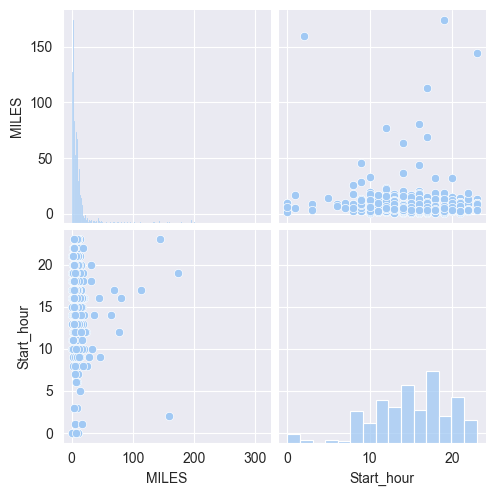

In [ ]:
# pairplot using Seaborn to visualize pairwise relationships between numerical variables in the dataset.
# This helps in identifying correlations, trends, and patterns
sns.pairplot(df)

>> From above graphs we can analyize that short trips dominate; long trips are rare and time-specific, indicating peak-hour demand and optimization opportunities. 

### Monthly Distribution of Passenger Travel Counts

In [ ]:
#Extracting the Value_counts for Months Column
df['Start_month'].value_counts()

Start_month
November     63
August       43
March        42
June         42
July         41
February     40
December     39
May          26
April        25
October      24
January      23
September    13
Name: count, dtype: int64

### Creating the countplot to see the distribution of data

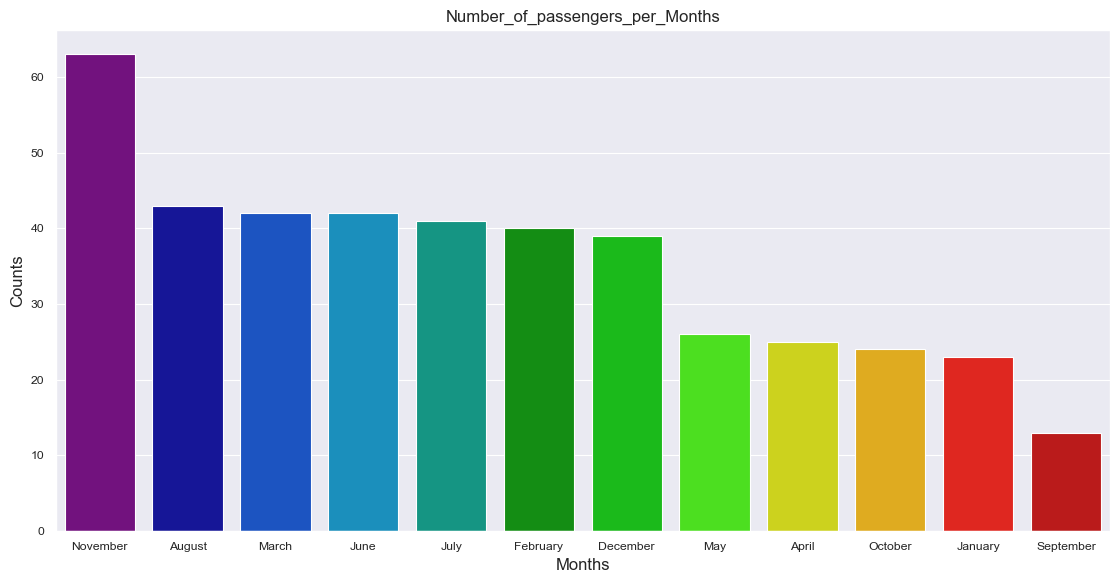

In [ ]:
# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})

sns.countplot(x= 'Start_month',data= df,  order= df['Start_month'].value_counts().index, palette= 'nipy_spectral')
plt.xlabel('Months')
plt.ylabel('Counts')
plt.title('Number_of_passengers_per_Months')
plt.show()

>> The graphs indicate that November experiences the highest number of passenger requests on Uber.

### Analyzing the Frequency Distribution of the Days Column

In [43]:
#Extracting the Frequency Distribution of the Days Column
df['Start_day'].value_counts()

Start_day
Friday       87
Monday       62
Tuesday      61
Thursday     61
Saturday     52
Wednesday    50
Sunday       48
Name: count, dtype: int64

### Creating the countplot to see the distribution of data

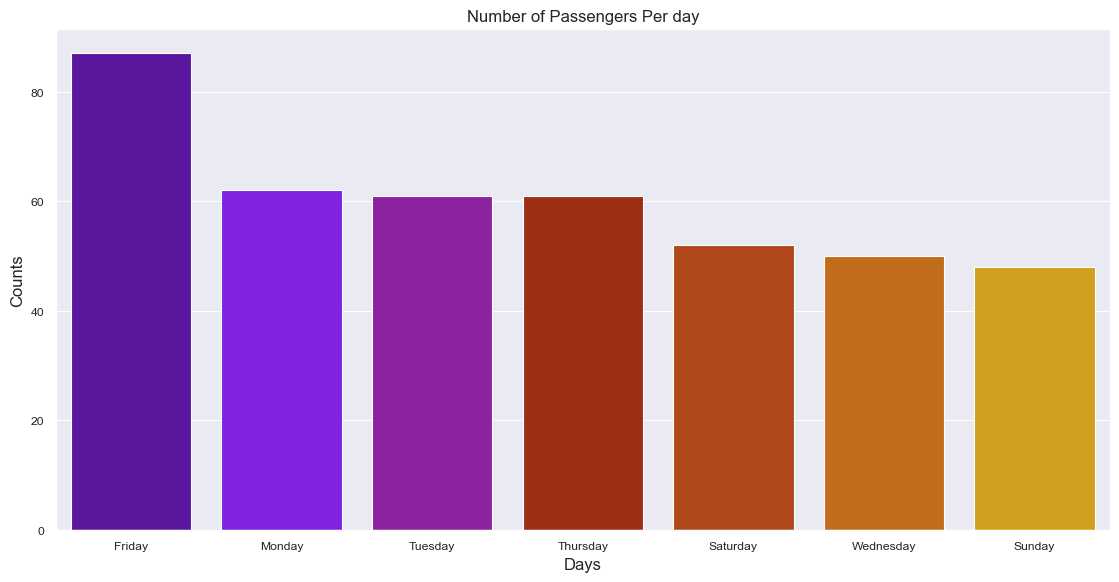

In [46]:
# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})


sns.countplot(x= 'Start_day', data= df, order= df['Start_day'].value_counts().index, palette= 'gnuplot')
plt.title('Number of Passengers Per day')
plt.xlabel('Days')
plt.ylabel('Counts')
plt.show()


>> Friday records the highest number of passenger requests on Uber

### Analyzing the Frequency Distribution of the Hours Column

In [47]:
df['Start_hour'].value_counts()

Start_hour
18.0    40
13.0    37
17.0    35
16.0    34
14.0    32
12.0    28
15.0    28
19.0    28
20.0    26
21.0    22
10.0    20
9.0     20
11.0    17
8.0     13
23.0    12
22.0    12
0.0      7
1.0      2
7.0      2
6.0      2
3.0      2
2.0      1
5.0      1
Name: count, dtype: int64

### Creating the countplot to see the distribution of data

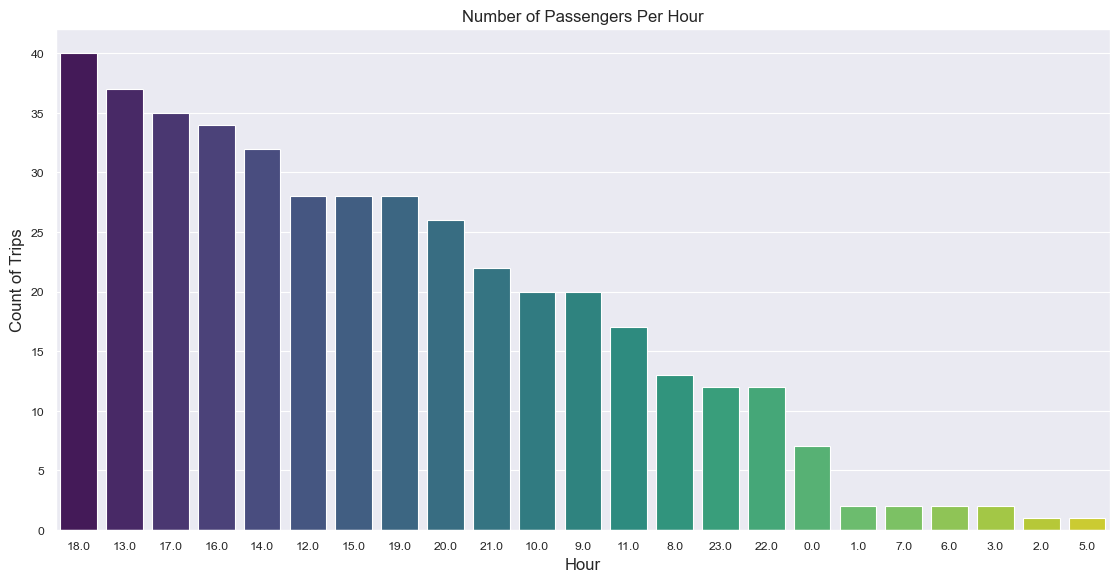

In [48]:
# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})

sns.countplot(x='Start_hour', data= df, order= df['Start_hour'].value_counts().index, palette= 'viridis')
plt.xlabel("Hour")
plt.ylabel("Count of Trips")
plt.title("Number of Passengers Per Hour")
plt.show()

>> 6 PM records the highest number of passenger requests on Uber.

### Examining the Frequency Distribution of the Category Column

In [49]:
df['CATEGORY'].value_counts()

CATEGORY
Business    1077
Personal      77
Name: count, dtype: int64

### Creating the countplot to see the distribution of data

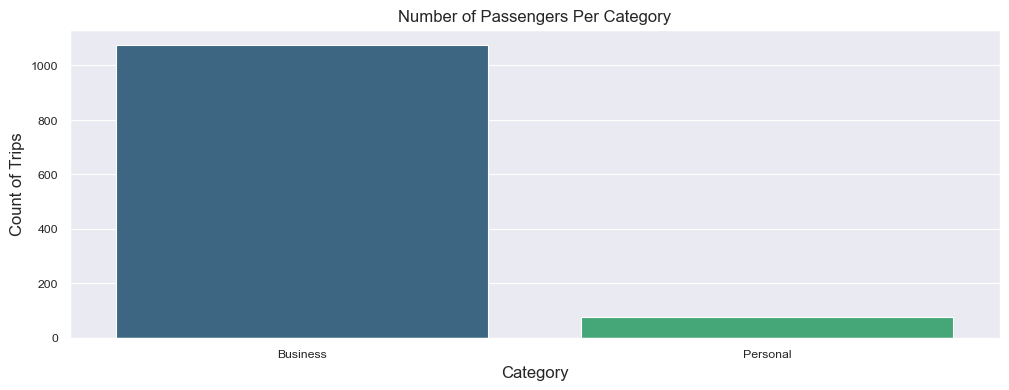

In [56]:
## Set the size of the plot (Adjust width and height as needed)
plt.figure(figsize=(12,4))

sns.countplot(x= 'CATEGORY', data= df, order= df['CATEGORY'].value_counts().index, palette='viridis')
plt.xlabel("Category")
plt.ylabel("Count of Trips")
plt.title("Number of Passengers Per Category")
plt.show()

>> The Business category has the highest number of Uber requests.

### Analyzing the Frequency Distribution of the Purpose Column

In [57]:
df['PURPOSE'].value_counts()

PURPOSE
Unknown            502
Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: count, dtype: int64

### Generating a Count Plot to Visualize Data Distribution

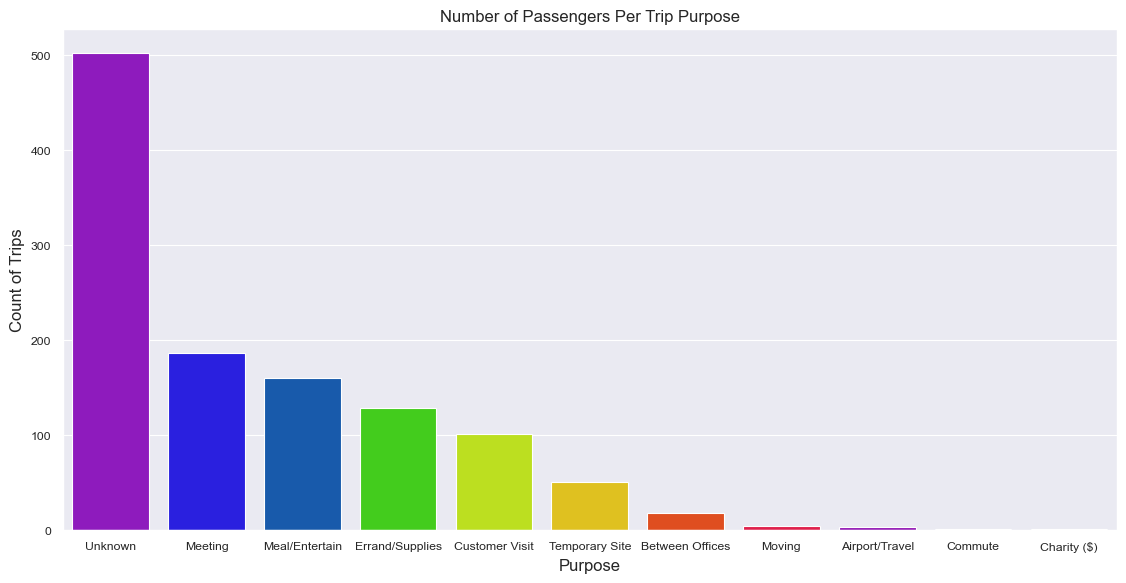

In [58]:
# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})

sns.countplot(x= 'PURPOSE', data= df, order= df['PURPOSE'].value_counts().index, palette= 'prism')
plt.xlabel("Purpose")
plt.ylabel("Count of Trips")
plt.title("Number of Passengers Per Trip Purpose")
plt.show()

>> A majority of passengers have an unknown trip purpose, while among the known purposes, "Meeting" is the most common.

### Examining the Frequency Distribution of the Start Column

In [74]:
top_starts= df['START'].value_counts().nlargest(10) #nlargest Selects the top 10 most frequent  from the value counts.
top_starts

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               36
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64

### Creating a Count Plot to Represent Data Distribution

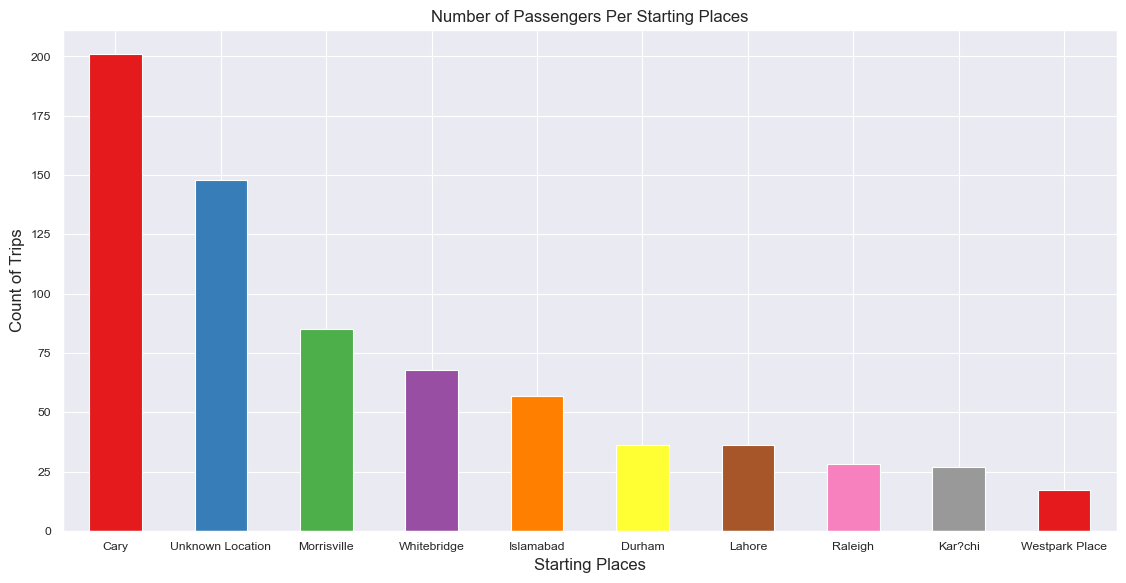

In [69]:
# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})


top_starts.plot(kind= 'bar',  color=sns.color_palette('Set1', n_colors=10))
plt.xlabel("Starting Places")
plt.ylabel("Count of Trips")
plt.title("Number of Passengers Per Starting Places")
plt.xticks(rotation=360)
plt.show()

>> Cary is the most frequent starting location for Uber requests.

### Analyzing the Frequency Distribution of the Stop Column

In [73]:
tops_stops= df['STOP'].value_counts().nlargest(10)
tops_stops

STOP
Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: count, dtype: int64

### Creating a Count Plot to Represent Data Distribution

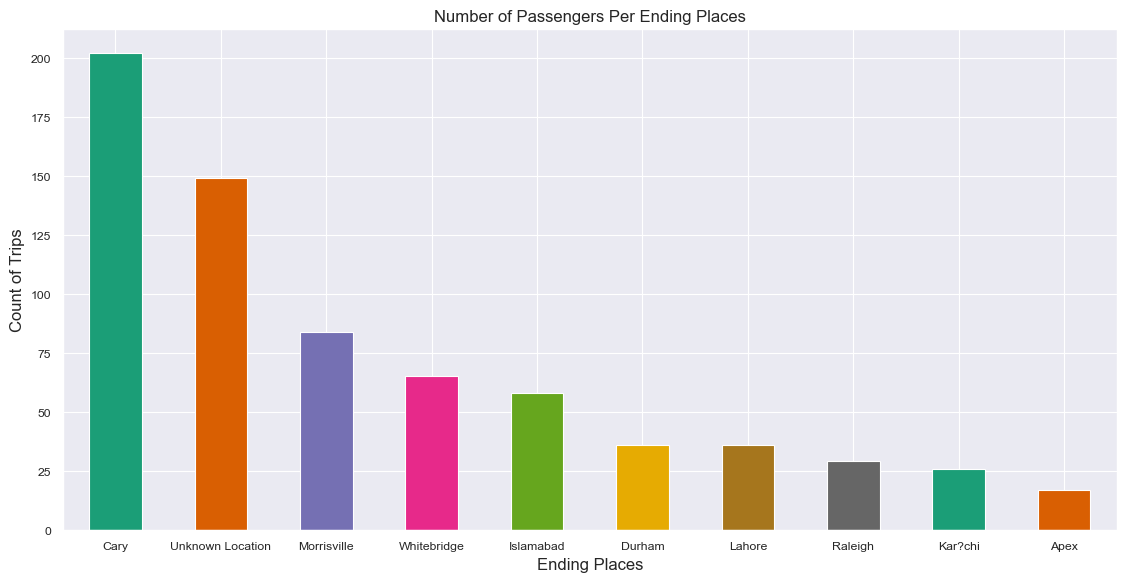

In [76]:
# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})


tops_stops.plot(kind= 'bar', color= sns.color_palette('Dark2', n_colors= 10))
plt.xlabel("Ending Places")
plt.ylabel("Count of Trips")
plt.title("Number of Passengers Per Ending Places")
plt.xticks(rotation=360)
plt.show()

>> Cary is the most frequent ending location for Uber requests.

### Grouping the "Category" column based on the "Miles" column.

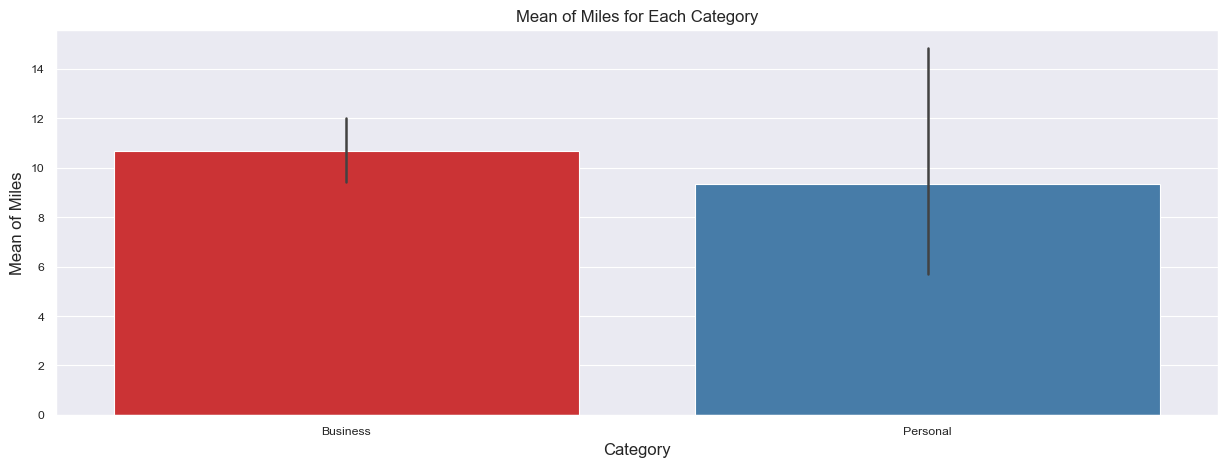

In [85]:
plt.figure(figsize=[15,5])
sns.barplot(x = df['CATEGORY'], y= df['MILES'],
            order= df.groupby('CATEGORY')['MILES'].mean().sort_values(ascending=False).index, palette= 'Set1')
plt.xlabel("Category")
plt.ylabel("Mean of Miles")
plt.title("Mean of Miles for Each Category")
plt.show()

>> The mean miles traveled for Business trips is greater than that for Personal trips.

### Grouping the "PURPOSE" Column by the "Miles" Column

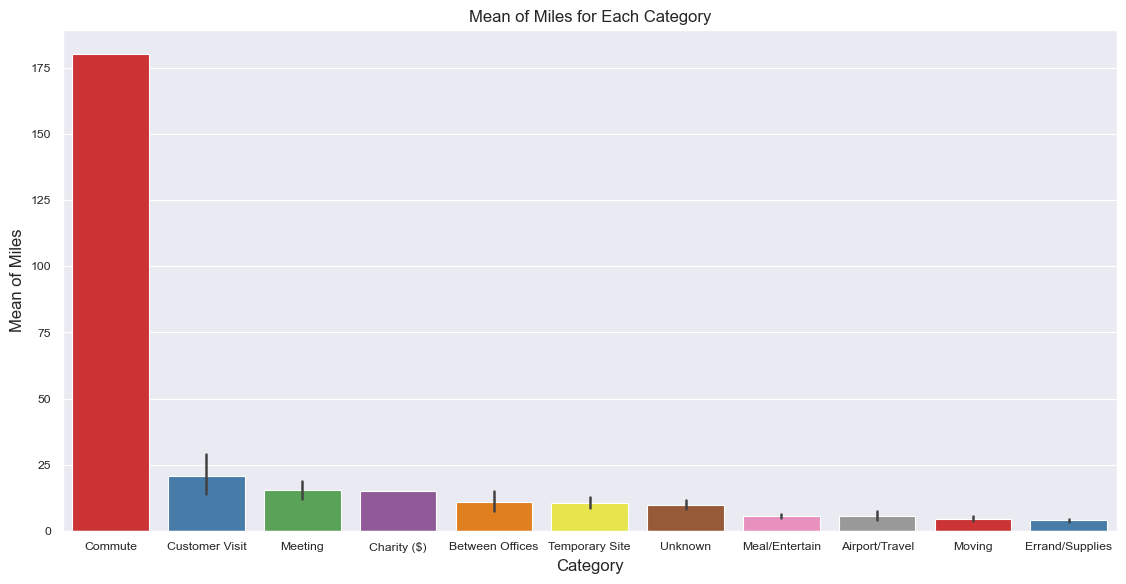

In [86]:
# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})


sns.barplot(x = df['PURPOSE'], y= df['MILES'],
            order= df.groupby('PURPOSE')['MILES'].mean().sort_values(ascending=False).index, palette= 'Set1')
plt.xlabel("Category")
plt.ylabel("Mean of Miles")
plt.title("Mean of Miles for Each Category")
plt.show()


>> The mean miles for Commute trips is greater than one.

### Grouping the "START" Column by the "Miles" Column

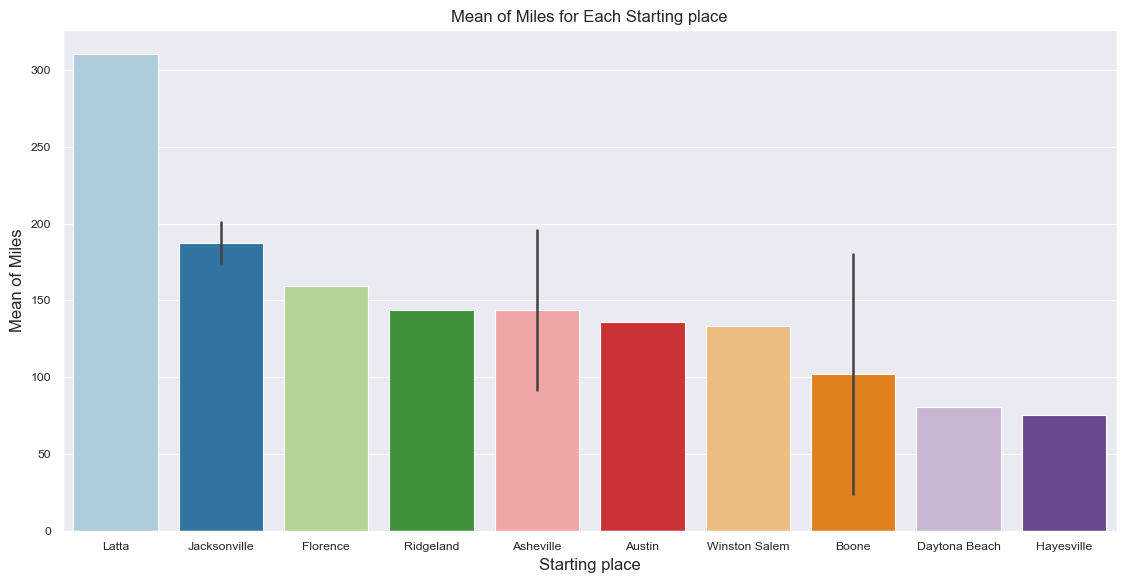

In [88]:
# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})

sns.barplot(x= df['START'], y= df['MILES'], order= df.groupby(df['START'])['MILES'].mean().sort_values(ascending= False).nlargest(10).index, palette= 'Paired')
plt.xlabel("Starting place")
plt.ylabel("Mean of Miles")
plt.title("Mean of Miles for Each Starting place")
plt.show()

>> Mean of Miles of Latta grater one

### Grouping the "STOP" Column by the "Miles" Column

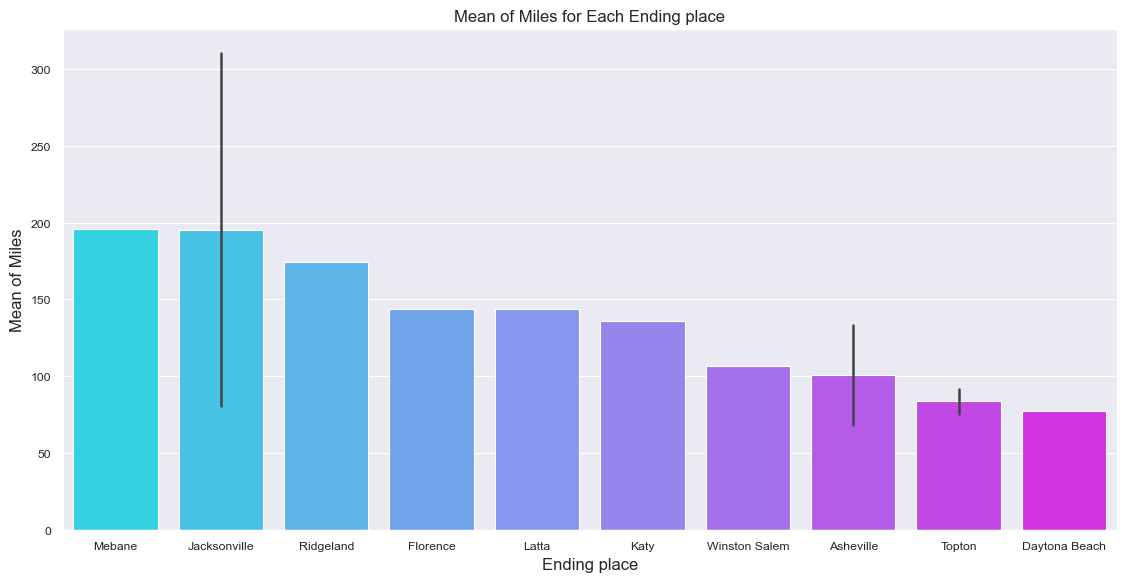

In [96]:
# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})

sns.barplot(x=df['STOP'], y= df['MILES'], order= df.groupby('STOP')['MILES'].mean().sort_values(ascending=False).nlargest(10).index, palette= 'cool')
plt.xlabel("Ending place")
plt.ylabel("Mean of Miles")
plt.title("Mean of Miles for Each Ending place")
plt.show()

>> Mean of Miles of Mebane grater one.

# Summary of Data Analysis
>> 1. The mean miles traveled for Commute trips exceed one mile.
>> 2. Friday records the highest number of Uber passenger requests.
>> 3. 6 PM is the peak hour for Uber trip requests.
>> 4. Business is the most frequently used category for Uber rides.
>> 5. A significant number of passengers did not specify their trip purpose, but among those who did, "Meeting" is the most common purpose.
>> 6. Cary is the most frequent starting and ending location for Uber trips.
>> 7. The mean miles traveled for Business trips are higher than for Personal trips.
>> 8. The mean miles for trips to Latta and Mebane exceed one mile.